<a href="https://colab.research.google.com/github/PrarthanaL/PRODIGY_DS_02/blob/main/Internship_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRODIGY** **INFOTECH** - **DATA** **SCIENCE** **INTERNSHIP**

**Task** **02**

**Perform** **data** **cleaning** **and** **exploratory** **data** **analysis** (**EDA**) **on** **a** **dataset** **o**f **your** **choice**, **such** **as** **the** **Titanic** **dataset** **from** **Kaggle**. **Explore** **the** **relationships** **between** **variables** **and** **identify** **patterns** **and** **trends** **in** **the** **data**.

**Importing** **the** **packages**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

**Loading** **the** **dataset**

In [5]:
df = pd.read_csv('/content/train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Exploratory** **Data** **Analysis** (**EDA**)

In [8]:
df.shape

(891, 12)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Exploring** **the** **data** **using** **visualizations**

<Axes: xlabel='Survived', ylabel='count'>

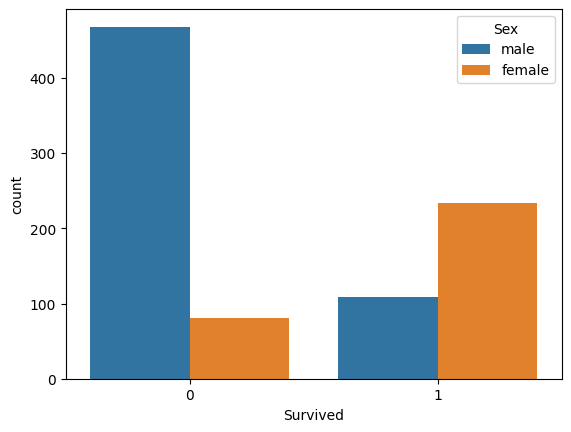

In [18]:
sns.countplot(x='Survived',hue='Sex',data=df)

<ipython-input-19-ef0f649fc5b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Survived'])


<Axes: xlabel='Survived', ylabel='Density'>

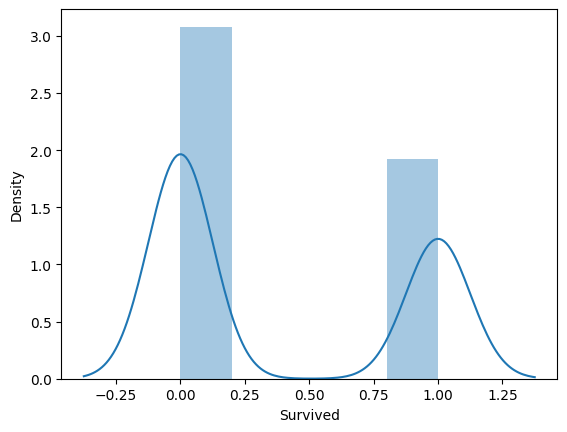

In [19]:
sns.distplot(df['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

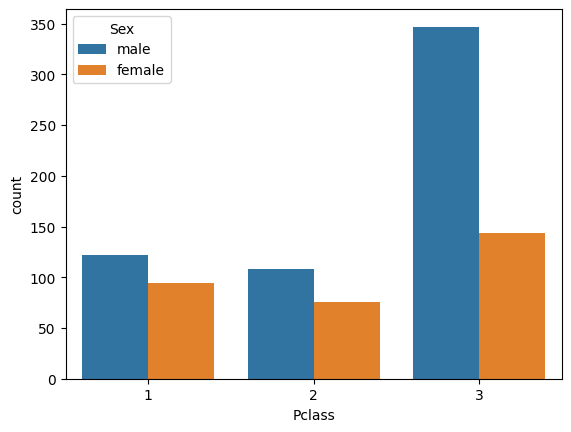

In [20]:
sns.countplot(x='Pclass', hue='Sex', data=df)

<ipython-input-21-4722c0bd3d7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins=5, norm_hist=True)


<Axes: xlabel='Age', ylabel='Density'>

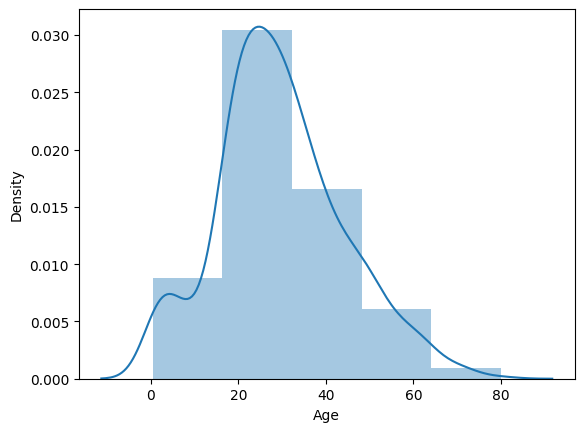

In [21]:
sns.distplot(df['Age'], bins=5, norm_hist=True)

<Axes: xlabel='Pclass', ylabel='count'>

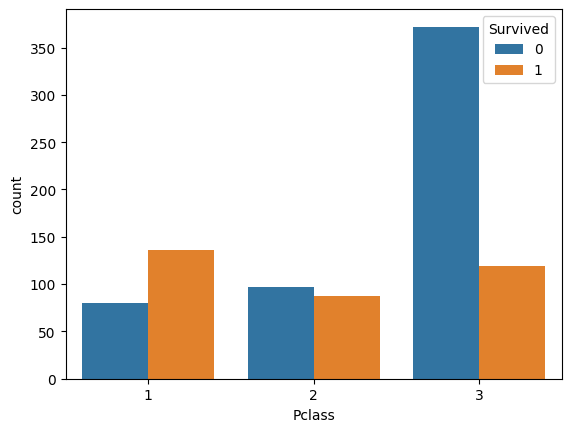

In [22]:
sns.countplot(x='Pclass', hue='Survived', data=df)

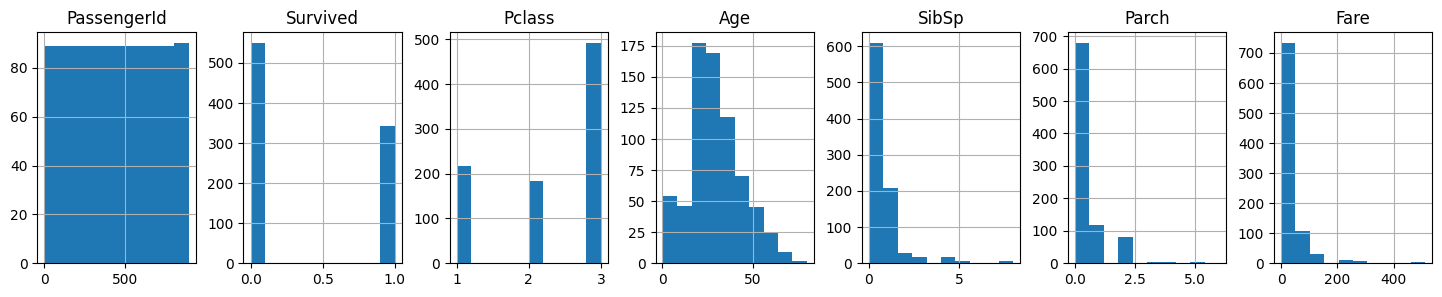

In [23]:
df.hist(layout=(1,7), figsize=(18,3))
plt.show()

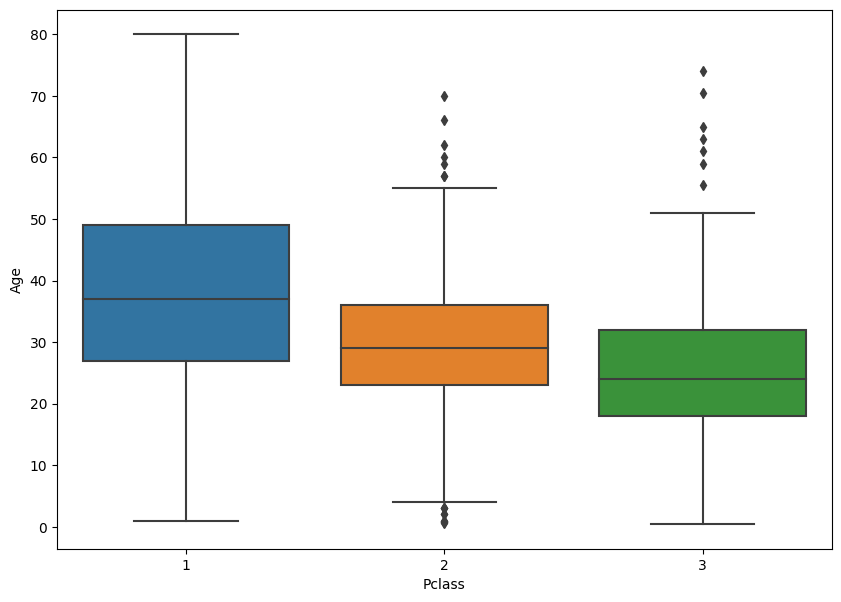

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Age', x='Pclass')
plt.show()

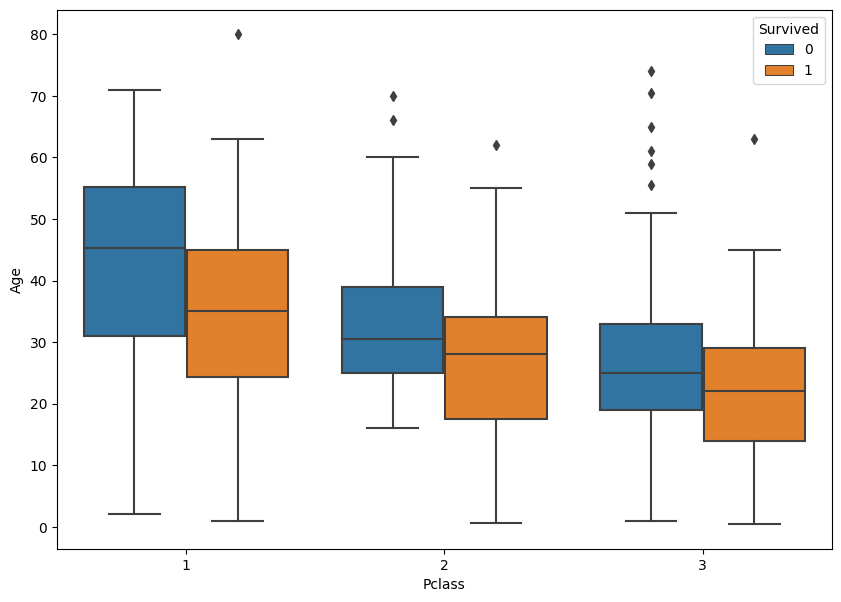

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Age', x='Pclass', hue='Survived')
plt.show()

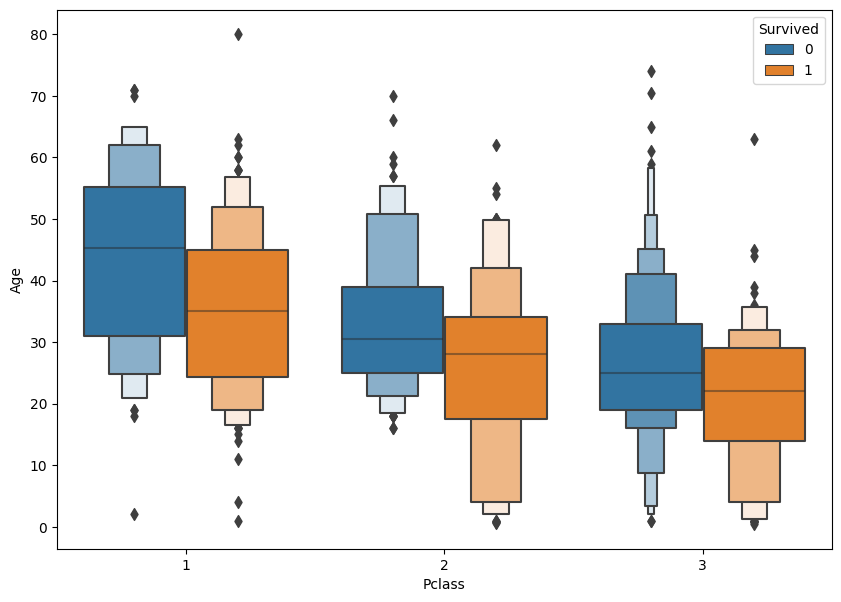

In [26]:
plt.figure(figsize=(10,7))
sns.boxenplot(data=df, y='Age', x='Pclass', hue='Survived')
plt.show()

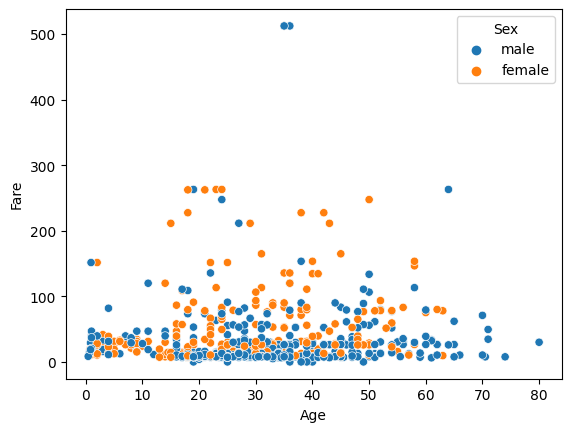

In [27]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Sex')
plt.show()

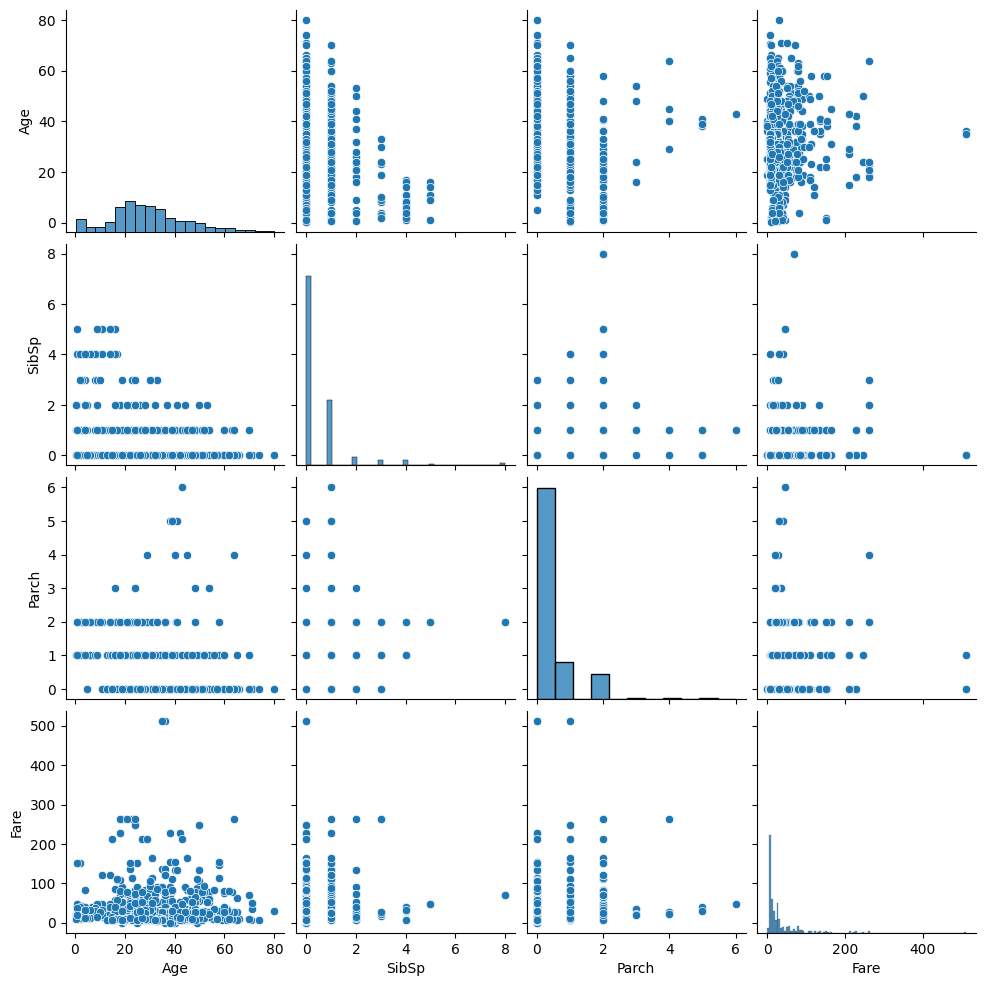

In [28]:
sns.pairplot(df[['Age','SibSp','Parch','Fare']])
plt.show()

In [29]:
correlation_matrix = df[['Age','SibSp','Parch','Fare']].corr()
correlation_matrix

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


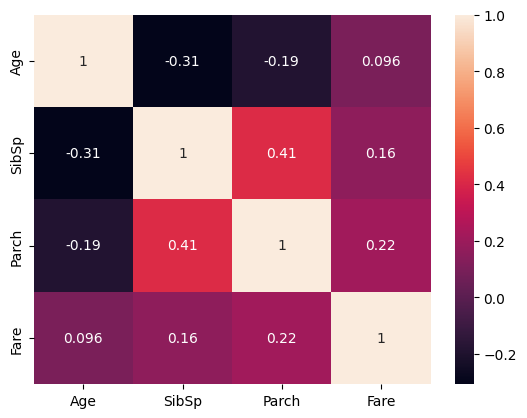

In [30]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [31]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

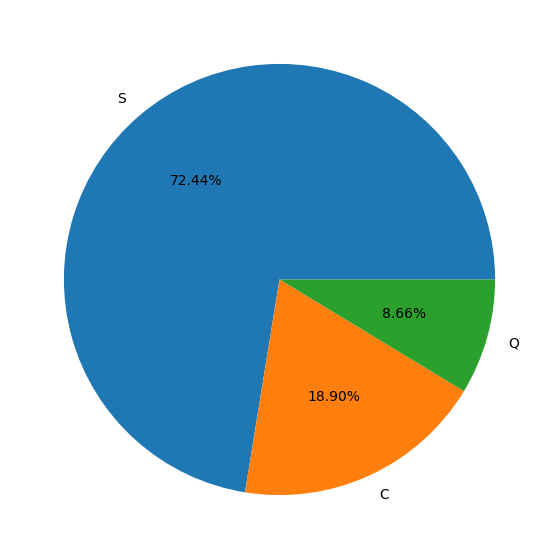

In [32]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Embarked'].value_counts().values,
        labels=df['Embarked'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

In [33]:
pd.crosstab(index=df['Survived'], columns=df['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [34]:
df['Family'] = df['Parch'] + df['SibSp']
df['Survived'] = df['Survived'].replace([0,1], ['N', 'Y'])
df['Sex'] = df['Sex'].replace(['male', 'female'], [0,1])

In [35]:
def extract_title(name):
    title = name.split(',')[1].split('.')[0]

    if (title.strip() == 'Mr'):
        return 0
    if (title.strip() == 'Mrs'):
        return 1
    if (title.strip() == 'Miss'):
        return 2

    else:
        return 3

df['Rank'] = df['Name'].apply(extract_title)

In [36]:
def groupCabins(Cabin):
    if(pd.notnull(Cabin)):
        return Cabin[0]
    else:
        return "U" # for Unknown

df['CabinGroup'] = df['Cabin'].apply(groupCabins)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Rank,CabinGroup
0,1,N,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,U
1,2,Y,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C
2,3,Y,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,U
3,4,Y,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,1,C
4,5,N,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,U


In [38]:
df.drop('Name', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Fare', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)

In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

imputer = SimpleImputer(strategy='most_frequent')
df[['Embarked']] = imputer.fit_transform(df[['Embarked']])

In [40]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Embarked      0
Family        0
Rank          0
CabinGroup    0
dtype: int64

In [41]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family,Rank,CabinGroup
0,N,3,0,22.0,S,1,0,U
1,Y,1,1,38.0,C,1,1,C
2,Y,3,1,26.0,S,0,2,U
3,Y,1,1,35.0,S,1,1,C
4,N,3,0,35.0,S,0,0,U


In [42]:
df = pd.get_dummies(df, columns=['Rank', 'CabinGroup', 'Pclass', 'Sex', 'Embarked'], drop_first=True)

In [43]:
df.head()

,Survived,Age,Family,Rank_1,Rank_2,Rank_3,CabinGroup_B,CabinGroup_C,CabinGroup_D,CabinGroup_E,CabinGroup_F,CabinGroup_G,CabinGroup_T,CabinGroup_U,Pclass_2,Pclass_3,Sex_1,Embarked_Q,Embarked_S
0,N,22.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,Y,38.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,Y,26.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,Y,35.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,N,35.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


**Modeling** **The** **Data**

In [44]:
x = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [45]:
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [46]:
model.score(x_train, y_train)

0.9620786516853933

In [47]:
model.score(x_test, y_test)

0.7541899441340782

**Conclusion** :-
**The** **Random** **Forest** **Classifier** **gives** **an** **accuracy** **of** **about** **74%** **for** **the** **titanic** **dataset**.